In [1]:
from main_copy import *
import pandas as pd
import matplotlib.pyplot as plt

Cały przepustowość 1

In [6]:
trip_ids = pd.read_csv('inputs/generated_trip.csv')
trains = [pd.read_csv(f'inputs/routes/{trip_ids.iloc[i][0]}.csv') for i in range(len(trip_ids))]
n=1
#A = TrainSimulation(trains,n, pd.read_csv('inputs/capacities1.csv'))

C:\Users\olkar\AppData\Local\Temp\ipykernel_19728\1769690686.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trains = [pd.read_csv(f'inputs/routes/{trip_ids.iloc[i][0]}.csv') for i in range(len(trip_ids))]
C:\Users\olkar\AppData\Local\Temp\ipykernel_19728\1769690686.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trains = [pd.read_csv(f'inputs/routes/{trip_ids.iloc[i][0]}.csv') for i in range(len(trip_ids))]
C:\Users\olkar\AppData\Local\Temp\ipykernel_19728\1769690686.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as l

In [33]:
A.simulation()

In [34]:
delays = np.array(A.delay)
delays.sum(axis=0)

array([    0,     0,     0, ..., 36477, 36477, 36477])

Text(0.5, 1.0, 'Przypadek dla przepustowości 1')

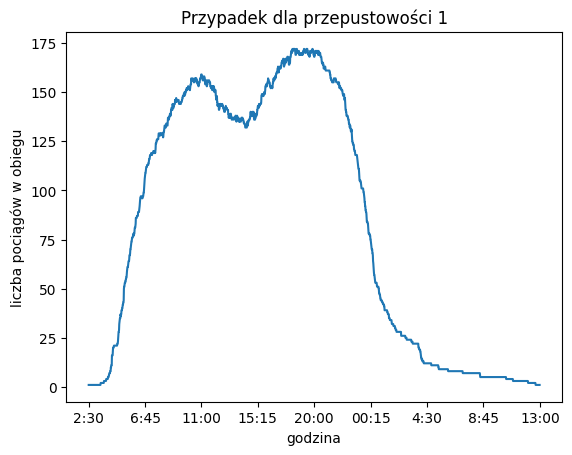

In [35]:
len_all_xd = []
for i in range(len(A.no_arrived)):
    len_all_xd.append(len(A.trains))

plt.plot(np.array(len_all_xd) - np.array(A.no_arrived) - np.array(A.no_stopped))
#plt.xticks(np.linspace(0, len(A.no_arrived)-30, 8), ['2:30', '5:30', '8:30', '11:30', '14:30', '17:30', '20:30', '23:30'])
plt.xticks(np.linspace(0, len(A.no_arrived), 9), ['2:30', '6:45', '11:00', '15:15', '20:00', '00:15', '4:30', '8:45', '13:00'])
plt.xlabel("godzina")
plt.ylabel("liczba pociągów w obiegu")
plt.title("Przypadek dla przepustowości 1")

Text(0.5, 1.0, 'Opóźnienie na trasie Warszawa - Bielsko-Biała')

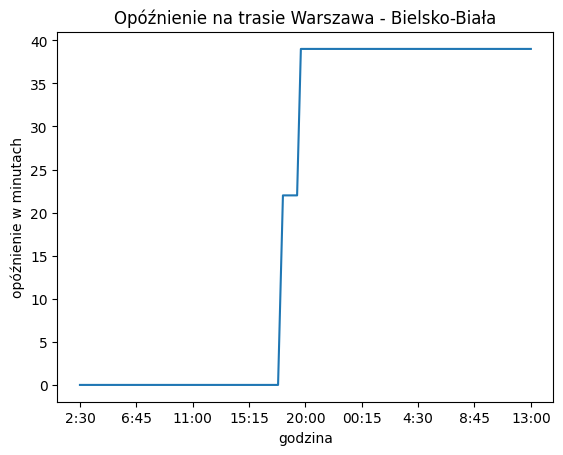

In [36]:
plt.plot(delays[16])
plt.xticks(np.linspace(0, len(A.no_arrived), 9), ['2:30', '6:45', '11:00', '15:15', '20:00', '00:15', '4:30', '8:45', '13:00'])
plt.xlabel("godzina")
plt.ylabel("opóźnienie w minutach")
plt.title("Opóźnienie na trasie Warszawa - Bielsko-Biała")

36477

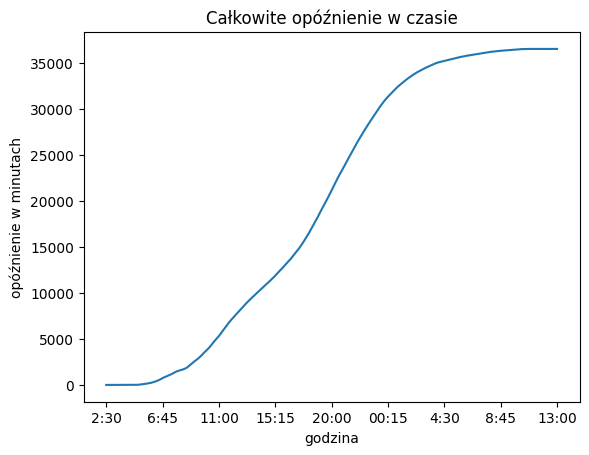

In [37]:
plt.plot(delays.sum(axis=0))
plt.xticks(np.linspace(0, len(A.no_arrived), 9), ['2:30', '6:45', '11:00', '15:15', '20:00', '00:15', '4:30', '8:45', '13:00'])
plt.xlabel("godzina")
plt.ylabel("opóźnienie w minutach")
plt.title("Całkowite opóźnienie w czasie")
delays.sum(axis=0)[-1]

In [38]:
sim_positions = A.positions

KeyboardInterrupt: 

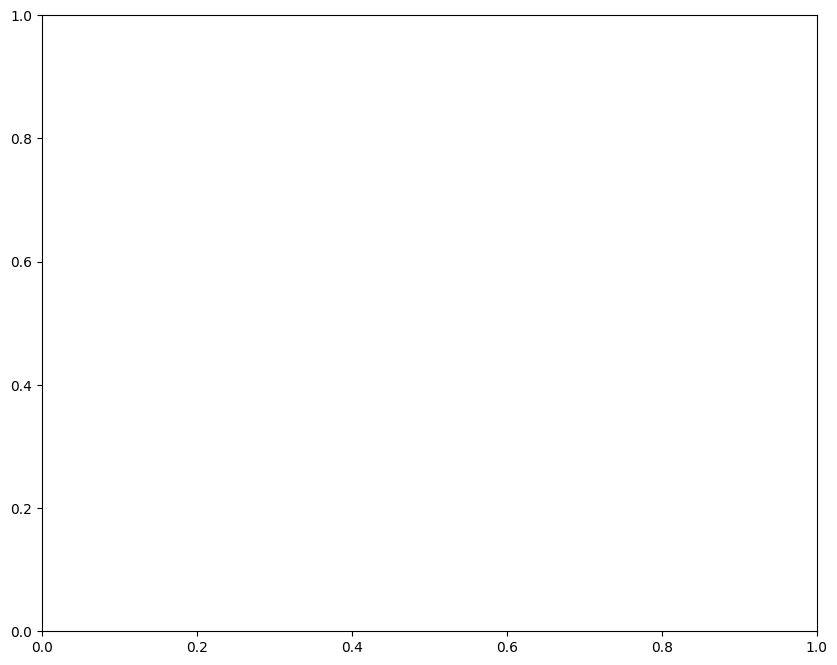

In [39]:
#B = create_anim(A,pd.read_csv('inputs/stops_io.txt'),pd.read_csv('inputs/id_capacities1.csv'))

In [ ]:
#save_anim(B.animate())

MovieWriter imagemagick unavailable; using Pillow instead.


Policzenie maksymalnych przepustowości

In [40]:
from main_count import *

c:\Users\olkar\Studia\Semestr 6\Matematyka Dla Przemysłu\symulacja_bez_galika\mathematics_for_industry\edges_capacity_creation.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trains = [pd.read_csv(f'inputs/routes/{trip_ids.iloc[i][0]}.csv') for i in range(len(trip_ids))]
c:\Users\olkar\Studia\Semestr 6\Matematyka Dla Przemysłu\symulacja_bez_galika\mathematics_for_industry\edges_capacity_creation.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trains = [pd.read_csv(f'inputs/routes/{trip_ids.iloc[i][0]}.csv') for i in range(len(trip_ids))]
c:\Users\olkar\Studia\Semestr 6\Matematyka Dla Przemysłu\symulacja_bez

In [41]:
A = TrainSimulationCount(trains,n, pd.read_csv('inputs/capacities.csv'))

In [42]:
A.simulation()

In [43]:
capacities = A.max_capacity_counter

edges = list(capacities.keys())
vals = list(capacities.values())
cap = DataFrame({'Edge': edges, 'Capacity': vals})
cap.to_csv('inputs/capacities_estimated.csv')

In [44]:
edges = []
for i in range(6):
    edges.append([k for k, v in capacities.items() if v == i])

In [45]:
for i in range(6):
    print(f'Number of edges with capacity {i}: {len(edges[i])}')

Number of edges with capacity 0: 172
Number of edges with capacity 1: 1229
Number of edges with capacity 2: 151
Number of edges with capacity 3: 14
Number of edges with capacity 4: 3
Number of edges with capacity 5: 1


In [46]:
edges[5]

[('Warszawa Centralna_i', 'Warszawa Centralna_o')]

In [47]:
edges[4]

[('Poznań Główny_i', 'Poznań Główny_o'),
 ('Kraków Główny_i', 'Kraków Główny_o'),
 ('Warszawa Wschodnia_i', 'Warszawa Wschodnia_o')]

In [11]:
cnt = A.count_edge

m = sorted(cnt, key=cnt.get, reverse=True)
for i in range(100):
    print(m[i], cnt[m[i]])

('Warszawa Wschodnia_i', 'Warszawa Wschodnia_o') 187
('Warszawa Centralna_i', 'Warszawa Centralna_o') 159
('Warszawa Zachodnia_i', 'Warszawa Zachodnia_o') 134
('Warszawa Wschodnia_o', 'Warszawa Centralna_i') 87
('Warszawa Centralna_o', 'Warszawa Zachodnia_i') 84
('Gdańsk Główny_i', 'Gdańsk Główny_o') 78
('Kraków Główny_i', 'Kraków Główny_o') 74
('Katowice_i', 'Katowice_o') 74
('Warszawa Centralna_o', 'Warszawa Wschodnia_i') 73
('Warszawa Zachodnia_o', 'Warszawa Centralna_i') 69
('Poznań Główny_i', 'Poznań Główny_o') 68
('Sopot_i', 'Sopot_o') 55
('Opole Główne_i', 'Opole Główne_o') 54
('Gdynia Główna_i', 'Gdynia Główna_o') 52
('Gdynia Główna_o', 'Sopot_i') 46
('Sopot_o', 'Gdańsk Oliwa_i') 46
('Gdańsk Oliwa_o', 'Gdańsk Wrzeszcz_i') 46
('Gdańsk Wrzeszcz_o', 'Gdańsk Główny_i') 45
('Gdańsk Wrzeszcz_o', 'Gdańsk Oliwa_i') 43
('Łódź Widzew_i', 'Łódź Widzew_o') 43
('Sopot_o', 'Gdynia Główna_i') 43
('Gdańsk Główny_o', 'Gdańsk Wrzeszcz_i') 43
('Gdańsk Oliwa_o', 'Sopot_i') 43
('Warszawa Gdańska_i'

Text(0.5, 1.0, 'Przypadek dla nieograniczonej (maksymalnej) przepustowości')

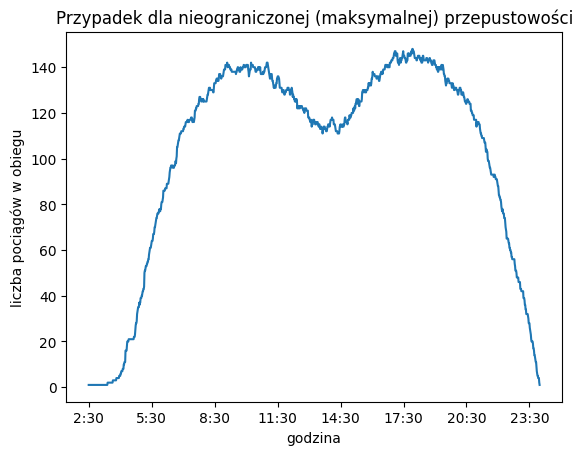

In [69]:
len_all_xd = []
for i in range(len(A.no_arrived)):
    len_all_xd.append(len(A.trains))

plt.plot(np.array(len_all_xd) - np.array(A.no_arrived) - np.array(A.no_stopped))
plt.xticks(np.linspace(0, len(A.no_arrived)-30, 8), ['2:30', '5:30', '8:30', '11:30', '14:30', '17:30', '20:30', '23:30'])
#plt.xticks(np.linspace(0, len(A.no_arrived), 9), ['2:30', '6:45', '11:00', '15:15', '20:00', '00:15', '4:30', '8:45', '13:00'])
plt.xlabel("godzina")
plt.ylabel("liczba pociągów w obiegu")
plt.title("Przypadek dla nieograniczonej (maksymalnej) przepustowości")

Gif wszystkie z maxymalną przepustowością

In [50]:
n=1
A = TrainSimulation(trains,n, pd.read_csv('inputs/capacities_estimated.csv'))

In [51]:
A.simulation()

In [52]:
delays = np.array(A.delay)
delays.sum(axis=0)

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
sim_positions = A.positions

In [54]:
#B = create_anim(A,pd.read_csv('inputs/stops_io.txt'),pd.read_csv('inputs/id_capacities_estimated.csv'))

In [55]:
#save_anim(B.animate())

przepustowość warszawa centralna. warszawa centralna = 1

In [56]:
A = TrainSimulation(trains,n, pd.read_csv('inputs/capacities_estimated_changed.csv'))

In [57]:
A.simulation()
sim_positions = A.positions

In [58]:
delays = np.array(A.delay)
delays.sum(axis=0)

array([    0,     0,     0, ..., 21753, 21753, 21753])

21753

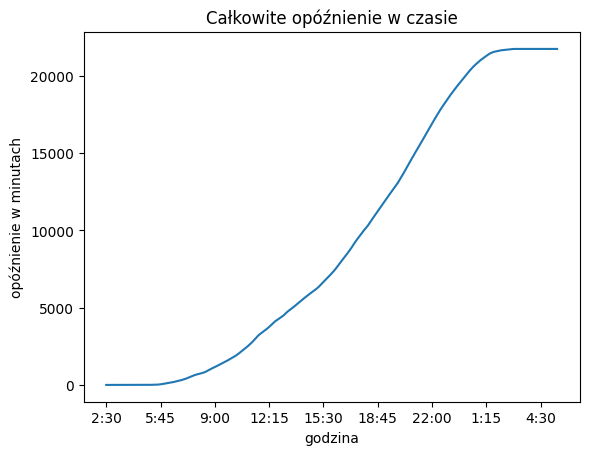

In [59]:
plt.plot(delays.sum(axis=0))
plt.xticks(np.linspace(0, len(A.no_arrived)-60, 9), ['2:30', '5:45', '9:00', '12:15', '15:30', '18:45', '22:00', '1:15', '4:30'])
plt.xlabel("godzina")
plt.ylabel("opóźnienie w minutach")
plt.title("Całkowite opóźnienie w czasie")
delays.sum(axis=0)[-1]

In [60]:
#B = create_anim(A,pd.read_csv('inputs/stops_io.txt'),pd.read_csv('inputs/id_capacities_estimated.csv'))

In [61]:
#save_anim(B.animate())

Opóźnienie jakiegoś ważnego pociągu

In [2]:
capacities = A.capacities

filtered = {}
for k, v in cnt.items():
    if capacities[k] == 1:
        filtered[k] = v

m = max(filtered, key=filtered.get)
print(m, filtered[m])

NameError: name 'A' is not defined

In [7]:
trains = [pd.read_csv(f'inputs/routes/{trip_ids.iloc[i][0]}.csv') for i in range(len(trip_ids))]
A = TrainSimulation(trains,n, pd.read_csv('inputs/capacities_estimated.csv'))

C:\Users\olkar\AppData\Local\Temp\ipykernel_19728\3246003752.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trains = [pd.read_csv(f'inputs/routes/{trip_ids.iloc[i][0]}.csv') for i in range(len(trip_ids))]
C:\Users\olkar\AppData\Local\Temp\ipykernel_19728\3246003752.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trains = [pd.read_csv(f'inputs/routes/{trip_ids.iloc[i][0]}.csv') for i in range(len(trip_ids))]
C:\Users\olkar\AppData\Local\Temp\ipykernel_19728\3246003752.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as l

In [8]:
A.simulation()
sim_positions = A.positions

In [9]:
delays = np.array(A.delay)
delays.sum(axis=0)

array([0, 0, 0, ..., 0, 0, 0])

0

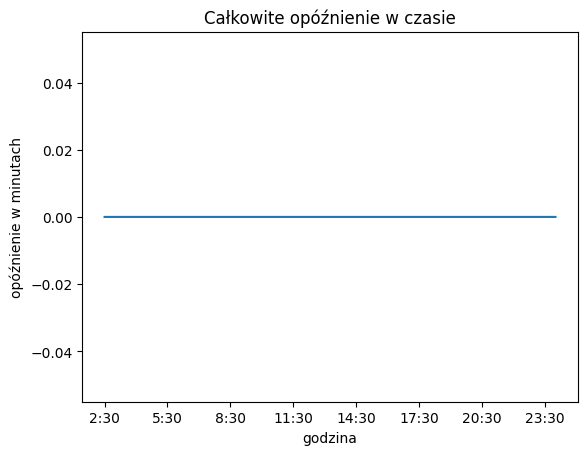

In [66]:
plt.plot(delays.sum(axis=0))
plt.xticks(np.linspace(0, len(A.no_arrived)-30, 8), ['2:30', '5:30', '8:30', '11:30', '14:30', '17:30', '20:30', '23:30'])
plt.xlabel("godzina")
plt.ylabel("opóźnienie w minutach")
plt.title("Całkowite opóźnienie w czasie")
delays.sum(axis=0)[-1]

In [67]:
#B = create_anim(A,pd.read_csv('inputs/stops_io.txt'),pd.read_csv('inputs/id_capacities_estimated.csv'))

In [68]:
#save_anim(B.animate())